In [40]:
%matplotlib inline
import numpy as np
from numpy import loadtxt
from lmfit.models import ExponentialModel, ConstantModel
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [101]:
def red(time):
    '''
    This should eliminate the issue of the weird time jump about 2/3 of way through collection also that t=0 if 0 counts
    '''
    return np.arange(0,len(time))
def hours(secs,counts):
    import numpy
    hours=numpy.arange(0,secs[len(secs)-1]//3600+1)
    binned_counts=[0]*len(hours)
    for i in range(0,len(secs)):
        index=i//3600
        binned_counts[index]+=counts[i]
    return hours,binned_counts
def sin(x, amp,omega,shift,y0):
    """ model decaying sine wave, subtract data"""
    return amp * np.sin(x * omega + shift)+y0
def doFit(hour_time,binned_counts):
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result
def doFit2(time,rates):
    time,rates = filter(time,rates)
    hour_time,binned_counts=hours(red(time),rate)
    length = len(binned_counts)
    while binned_counts[length-1]<binned_counts[length-2]*.9:
        hour_time=hour_time[:-1]
        binned_counts=binned_counts[:-1]
        length = len(binned_counts)
        
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result
def filter(time,rate):
    returnTime=[]
    returnRate=[]
    for i in range(len(time)):
        if time[i]!=0 and rate[i] == 0:
            continue
        else:
            returnTime.append(time[i])
            returnRate.append(rate[i])
    return returnTime,returnRate

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 = -0.270 



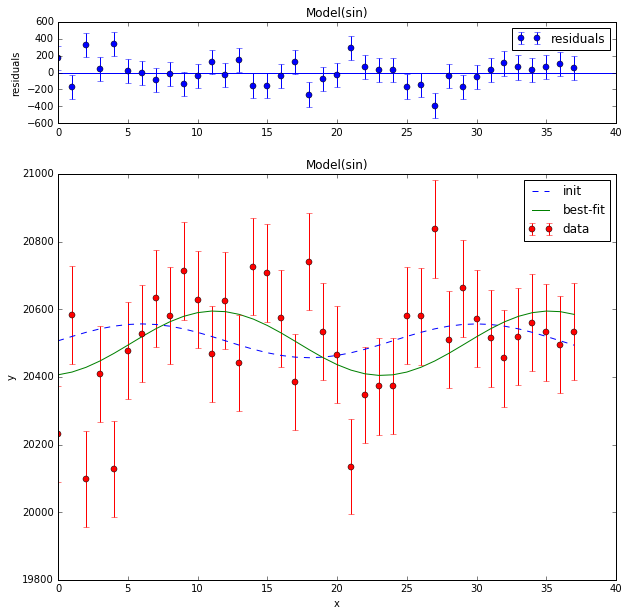

In [102]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 



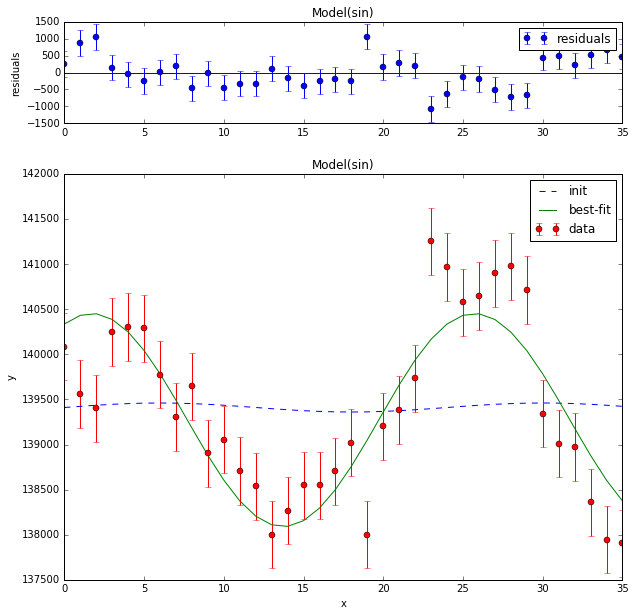

In [103]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 46
    # variables        = 3
    chi-square         = 293.633
    reduced chi-square = 6.829
[[Variables]]
    amp:     632.741572 +/- 186.8383 (29.53%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.13140260 +/- 0.282549 (24.97%) (init= 0)
    y0:      1.1216e+05 +/- 129.2726 (0.12%) (init= 112196.9)
[[Correlations]] (unreported correlations are <  0.100)



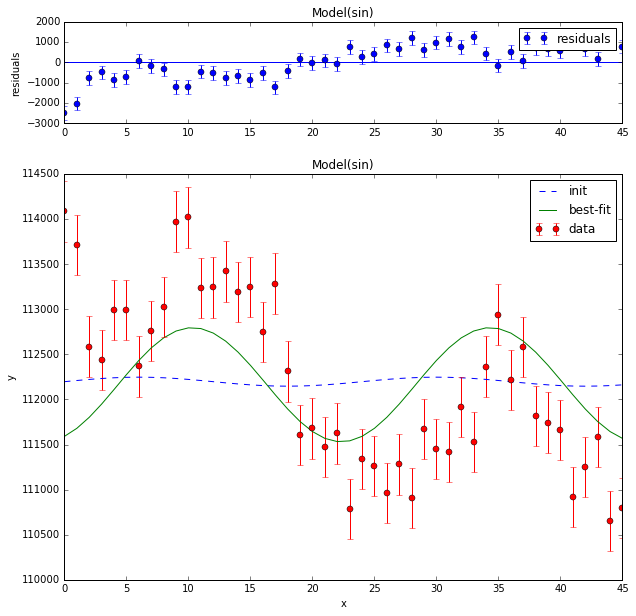

In [104]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres208mVRate2015_11_05-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 83
    # variables        = 3
    chi-square         = 172.274
    reduced chi-square = 2.153
[[Variables]]
    amp:    -24.3036239 +/- 31.37888 (129.11%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -0.71871222 +/- 1.290198 (179.52%) (init= 0)
    y0:      18802.7045 +/- 22.27263 (0.12%) (init= 18803.54)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.107 



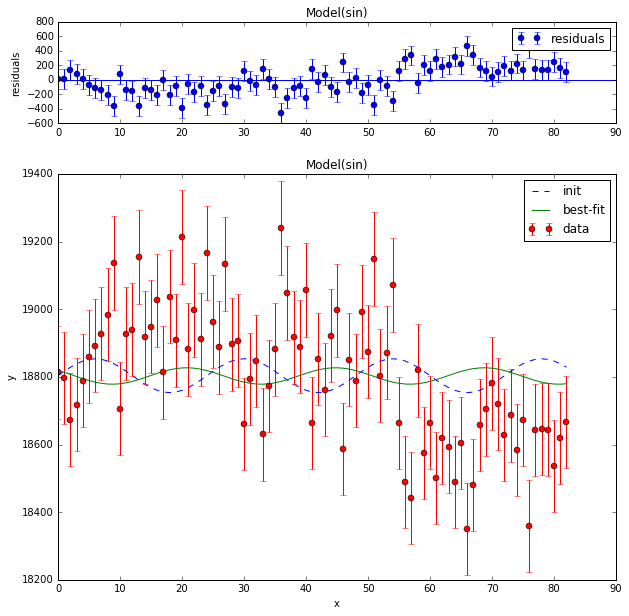

In [105]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres400mVRate2015_11_09-01-48.txt', unpack=True)
doFit2(time,rate)

# Temperature Stuff

In [109]:
time_temp,temp = np.loadtxt('Data/tempData.txt',unpack=True)

In [111]:
hour_temp,binned_temp = hours(time_temp,temp)
hour_temp=hour_temp[:len(hour_temp)/2]
binned_temp=binned_temp[:len(hour_temp)/2]
plt.plot(hour_temp,binned_temp)

MemoryError: 